Andy Snitgen  
Professor Karen Jin  
Comp 574 - Applied Computing II
December 7, 2021  

## Milestone III - Prediction
```
This program will predict Revenue and Ratings categories from the csv files created by the Milestone I file
Input: .csv file containing API data collected in Milestone I 
Output: f'strings and plots showcasing the predicted data
```
* The input file goes in the seventh line
    * The syntax is: df = pd.read_csv('data/**filename_here**.csv, skiprows=1)`

#### Import, read and create
```
This code block imports necessary libraries, reads the csv and displays the dataframe
Input: csv, the file contianing movie data from Milestone I
Ouput: df, the dataframe created from the csv
        df_display, the original dataframe to remain in string formats for viewing
```
* Uses Libraries: Pandas, math, matplotlib, numpy

In [202]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None  # Gets rid of the copy warning

# Create the dataframe
df = pd.read_csv('data/007_data.csv', skiprows=1)  # Change file to read in here
df_display = df.copy()


### Data Cleaning
```
Uses anonymous lambda to change formatted strings to floats
Input: df, full of formatted strings (ex: $#,###,###)
Ouput: df, all strings changed to numerical values
```
* 1 is used in cases of 'No Data' 
    * Uses if statements within lambda functions to determine null values

<p> We will begin our predictive analysis by cleaning the data.  Essentially, this means replacing all null values.  But it also includes transforming all of the outputs values from formatted, easy to read strings into numeric floats.  This is necessary for mathematical calculations and to ease the data into the machine learning algorithms used later. It is accomplished with anonymous lambda functions that contain string manipulation techniques such as strip and replace.  In cases where null values can exist, if statements are used to determine them, and the null value, 'No Data' is replaced with a 1.  This would alter the answers of math operations, but as we see in the next code block; we will changes these values next. </p>

In [203]:
# Turn all numeric columns from formatted strings into floats
df['Adjusted Revenue'] = df['Adjusted Revenue'].apply(lambda x:  1 if x == 'No Data'  else float(x.replace(',', '').replace('$','')))
df['US Box Office'] = df['US Box Office'].apply(lambda x: 1 if x == 'No Data'  else float(x.replace(',', '').replace('$','')))
df['International Revenue'] = df['International Revenue'].apply(lambda x: 1 if x == 'No Data'  else float(x.replace(',', '').replace('$','').strip(' (est.)')))
df['Average Rating'] = df['Average Rating'].apply(lambda x: float(x.replace('%', '')))
df['Metacritic'] = df['Metacritic'].apply(lambda x: float(x.replace('%', '')))
df['IMDb Rating'] = df['IMDb Rating'].apply(lambda x: float(x.replace(' / 10', '').replace(' (est.)', '')))
df['IMDb Rating'] = df['IMDb Rating'].apply(lambda x: x*10)

### Feature Engineering 1
```
Replaces 1 (Null value) with average value for the column
```
* Uses built in .mean() function to find averages

<p> Our next task is to replace the null values that have been changed to 1, with something more realistic.  This keeps them from skewing the data too heavily in situations where hard, real-world numbers are not available.  We determine what is a realistic approximation by taking the average of the column and replacing the null values with these mean values.  While it is obviously not as good as actual data, it provides a reasonable estimation and allows for more data points then simply deleting incomplete rows.  These extra data points are at a premium when it comes time to run the prediction algorithms and help to keep the predictions more accurate.  A loop was used to search the columns as opposed to fillna because of an issue detecting null values.  In some instances, values that should be null were not.  The loop was used because it worked without issue. </p>

In [204]:
# Fill in 'No Data' entries with mean for column
for index, row in df.iterrows():
    if df['Adjusted Revenue'][index] == 1:
        df['Adjusted Revenue'][index] = df['Adjusted Revenue'].mean()
    if df['US Box Office'][index] == 1:
        df['US Box Office'][index] = df['US Box Office'].mean()
    if df['International Revenue'][index] == 1:
        df['International Revenue'][index] = df['International Revenue'].mean()

### Feature Engineering 2
```
Creates 2 new columns that rank each films 'Adjusted Revenue' and 'Average Rating' as low, average, or high.
```
* The low, average, and high tags are used only in the display dataframe, the numeric frame contains categories 0, 1, and 2
* Uses qcut to determine the three groups
* uses both a map and a lambda function to change the numeric groups to strings for the display
    * The lambda function contains a nested if statement

<p> Next, we will create the data to be predicted.  We will do this by creating two new columns, 'Rating Category' and 'Revenue Category'.  What these columns are is each films 'Adjusted Revenue' and 'Adjusted Rating' grouped into three categories.  The categories are low, average, and high.  It is important to note that qcut function ranks movies based solely on their own data set.  So, a movie is ranked as a high earner if it made a large amount of money for its series, even if the series in general trends toward low financial returns.  This is a more useful metric than comparing them to all films in general, as it keeps high or low earning series from having all their movies classified as such.  In the original dataframe, each group is assigned a numberic title 0, 1, or 2, for low, average, and high respectively.  These are changed in the display dataframe into text strings for easier viewing.  The code for this is interesting as it uses a map function in the 'Rating Category' and a nested if statement within a lambda function for the 'Revenue Category'. </p>

In [205]:
# Use qcut() to put adjusted revenue and Average Rating into 3 groups 
df['Revenue Category'] = pd.qcut(df['Adjusted Revenue'], q=3, labels=False)
df['Rating Category'] = pd.qcut(df['Average Rating'], q=3, labels=False)

# Add Changes to df_display (the formatted for viewing dataframe)
df_display[[ 'Revenue Category', 'Rating Category']] = df[['Revenue Category', 'Rating Category']]

# Change qcut numbers to qualatative categories in df_display
bin = {
    0: 'Low',
    1: 'Average',
    2: 'High'
}
df_display['Rating Category'] = df_display['Rating Category'].map(bin)  # Both map() and apply() do the same thing with different syntax
df_display['Revenue Category'] = df_display['Revenue Category'].apply(lambda x: 'Low' if x == 0 else ('Average' if x == 1 else 'High'))

### Dataframe Double Check
```
Displays the data frame with the feature engineered colums and charts displaying the data to be predicted
```
* Revenue Category classifes a movies earnings as high, average or low
* Rating Categoy classifies movie ratings as high, average or low
* These new columns will be predicted to test accuracy
<p> At this point, it is a good time to double check that the feature engineering worked correctly.  A quick look at the data frame is in order, and why the display data frame has been carried throughout the calculations above.  Its only difference is all of the numeric values have been changed to strings for easier viewing.  However, from this point on we will create new, divergent data frames for each of the two categories to be predicted.  These individualized data sets will provide more accurate predicitions later on.  In addition, we will print charts with a trendline for both the 'Adjusted Revenue' and the 'Average Rating' of the franchise so that we can visualize the data to be predicted. </p>

In [206]:
df_display

,Title,Year,Actor,US Box Office,International Revenue,Adjusted Revenue,Average Rating,IMDb Rating,Metacritic,Revenue Category,Rating Category
0,Dr. No,1962,Sean Connery,"$16,067,035","$56,892,409 (est.)","$509,590,753",75.0%,7.2 / 10,78%,Low,High
1,From Russia with Love,1963,Sean Connery,"$24,796,765","$87,803,860 (est.)","$778,757,111",79.0%,7.4 / 10,84%,Average,High
2,Goldfinger,1964,Sean Connery,"$51,081,062","$180,874,982 (est.)","$1,583,531,294",82.0%,7.7 / 10,87%,High,High
3,Thunderball,1965,Sean Connery,"$63,595,658","$225,188,418 (est.)","$1,940,194,814",67.0%,7 / 10,64%,High,High
4,You Only Live Twice,1967,Sean Connery,"$43,084,787","$152,560,651 (est.)","$1,239,669,481",65.0%,6.9 / 10,61%,High,Average
5,On Her Majesty's Secret Service,1969,George Lazenby,"$22,774,493","$80,643,116 (est.)","$596,363,534",64.0%,6.7 / 10,61%,Low,Average
6,Diamonds Are Forever,1971,Sean Connery,"$43,819,547","$155,162,393 (est.)","$1,039,779,592",62.5%,6.6 / 10,59%,High,Average
7,Live and Let Die,1973,Roger Moore,"$35,377,836","$125,270,799 (est.)","$765,731,866",61.5%,6.8 / 10,55%,Average,Low
8,The Man with the Golden Gun,1974,Roger Moore,"$20,972,000","$74,260,596 (est.)","$408,809,853",55.0%,6.7 / 10,43%,Low,Low
9,The Spy Who Loved Me,1977,Roger Moore,"$46,838,673","$165,852,937 (est.)","$742,780,315",63.0%,7.1 / 10,55%,Average,Average


The franchise has seen revenue decrease over time


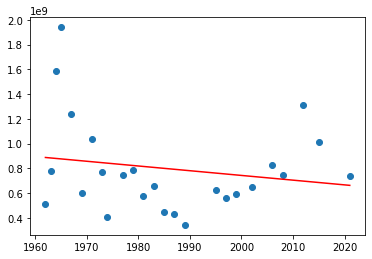

In [207]:
# Create the Revenue Plot
x = df['Year'].tolist()
y = df['Adjusted Revenue'].tolist()
plt.scatter(x, y)

# Create the Trendline
z = np.polyfit(x, y, 1)  # Gets values for trendline equation 
p = np.poly1d(z)  # Creates the trendline equation
plt.plot(x,p(x), color = 'red')

# Display the results
if z[0] > 0.05:
    print('The franchines has seen revenue increase over time')
elif z[0] < -0.05:
    print('The franchise has seen revenue decrease over time')
else:
    print('The franchise has maintained a consistent revenue over time')
plt.show()

The franchise has maintained a consistent quality over time


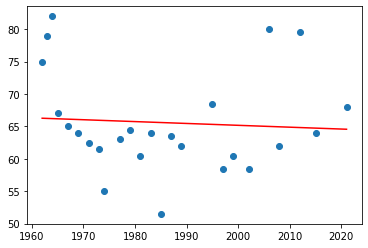

In [208]:
# Create the Average Review Score Plot
x = df['Year'].tolist()
y = df['Average Rating'].tolist()
plt.scatter(x, y)

# Create the Trendline
z = np.polyfit(x, y, 1)  # Gets values for trendline equation 
p = np.poly1d(z)  # Creates the trendline equation
plt.plot(x,p(x), color = 'red')

# Display the results
if z[0] > 0.05:
    print('The franchines has seen review scores improve over time')
elif z[0] < -0.05:
    print('The franchise has seen review scores decline over time')
else:
    print('The franchise has maintained a consistent quality over time')
plt.show()

### Feature Engineering specific to the Revenue Category
```
Changes the 'Ratings Category' column to 3 columns with boolean values
Input: df, the original dataframe with added category columns
Output: df_rev, dataframe engineered to predict the 'Revenue Category'
```
* Uses 1-hot encoding to change 'Rating Category' into 3 columns of 0 and 1
* Drops any column containing strings ('Title' and 'Actor')

<p> Now that we have looked at the data to be predicted, and the data the predictions will be based on; we will create a new data frame and format it for maximum prediction accuracy.  Since we are looking at the 'Revenue Category' in this case, we will begin by using 1-hot encoding to change the 'Rating Category' into 3 seperate columns with boolean values.  We've attached the prefix rating to each column and also drop any columns that cannot be converted to numeric values.  In this case, that is simply the title and lead actor. </p>

In [209]:
# Use 1-hot encoding for the categorical features created by qcut()
df_rev = df.copy()
df_rev = pd.get_dummies(df_rev, columns=['Rating Category'], prefix = ['Rating'])
df_rev = df_rev.drop(['Title', 'Actor'], axis=1)

### Create the Lists for the Revenue Prediction
```
Converts df_rev to scalar values, drops column to be predicted and uses sklearn model selection to create training data
```
* Test size determines the split of training data versus test data

<p> First, we start by setting the y value to be tested against.  This data is simply the 'Revenue Category' column in its numeric form.  We then drop that column as we can't predict data we already have.  Next, we use the standard scaler of sklearn to transform the data set to numeric values given a relative weight.  This helps improve the models we will create from this data by making them more accurate.  The final step for this code block is to use the test train split function of sklearn to divide the scaled dataset into the 4 lists required by to create a model. </p>

In [210]:
# Set X and Y for the training set
y = df_rev['Revenue Category']
df_rev = df_rev.drop(['Revenue Category'], axis=1)

# Scale the data
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
data_scaled = std_scaler.fit_transform(df_rev)

# Set the X for the training set
X = data_scaled

# Build the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### Create and Test the Revenue Category Models
```
Creates both a KNN and DTC models and tests their accuracy
Input: X_train, X_test, y_train, y_test, lists created by train_test_split
Output: f-strings, contain accuracy scores for each model
```
* n_neighbors determines the number of relative datapoints each prediction has.  Essentially, it determines the complexity of the model
    * More neighbors equals a more accurate model that requires more data points

<p> Now we will create our models and test them.  This involves several steps.  We will first run them for the KNN style classifier, then again for the DTC model; with either one, the process is the same.  First, the model is created and then fit the data using the x and y train lists the split created.  Then the predict method is used on the object created by the classifier.  This method takes an input of the x test list created by the split function.  It produces our predicted results.  We then use the accuracy_score of the sklearn library to test our predicted list against the actual data that we saved and dropped earlier.  It returns the accuracy as a percentage, which we then display as a formatted f-string.  This process is repeated twice, once for ecah: KNN and DTC.  </p> 

In [211]:
# Create the KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

# Make predictions for 'Rating Category' and 'Revenue Category'
y_pred = knn.predict(X_test)

# Print the Accuracy score
from sklearn.metrics import accuracy_score
score_knn = accuracy_score(y_test, y_pred) * 100
score_knn = "{:,.2f}%".format(score_knn)
print('Accuracy of Revenue Category Prediction using KNN: '+ score_knn)

Accuracy of Revenue Category Prediction using KNN: 71.43%


In [212]:
# Create a DTC model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)

# Make the Prediction for 'Revenue Category'
y_pred2 = clf.predict(X_test)

# Print the results
score_dct = accuracy_score(y_test, y_pred) * 100
score_dct = "{:,.2f}%".format(score_dct)
print('Accuracy of Revenue Category Prediction using DTC: '+ score_dct)

Accuracy of Revenue Category Prediction using DTC: 71.43%


### Feature Engineering specific to the Ratings Category
```
Changes the 'Ratings Category' column to 3 columns with boolean values
Input: df, the original dataframe with added category columns
Output: df_rev, dataframe engineered to predict the 'Revenue Category'
```
* Uses 1-hot encoding to change 'Rating Category' into 3 columns of 0 and 1
* Drops any column containing strings ('Title' and 'Actor')

<p> We have tested our models against one category, the inflation adjusted revenue.  Lets see if our models maintain a consistent accuracy if we test for a different statistic. So now we will return to the original data frame and then tweak it to create a new data frame, rate.  This process is exactly the same as before, with the exception that is now the 'Revenue Category' column that is the subject of the 1-hot encoding. </p>   

In [213]:
# Use 1-hot encoding for the categorical features created by qcut()
df_rate = df.copy()
df_rate = pd.get_dummies(df_rate, columns=['Revenue Category'], prefix = ['Revenue'])
df_rate = df_rate.drop(['Title', 'Actor'], axis=1)

### Create the Lists for the Rating Prediction
```
Converts df_rev to scalar values, drops column to be predicted and uses sklearn model selection to create training data
```
* Test size determines the split of training data versus test data

In [214]:
# Set Y for the training set
y2 = df_rate['Rating Category']
df_rate = df_rate.drop(['Rating Category'], axis=1)

# Scale the data
from sklearn.preprocessing import StandardScaler
std_scaler2 = StandardScaler()
data_scaled2 = std_scaler2.fit_transform(df_rate)

# Set the X for the training set
X2 = data_scaled2

# Build the training and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=1)

### Create and Test the Revenue Category Models
```
Creates both a KNN and DTC models and tests their accuracy
Input: X_train, X_test, y_train, y_test, lists created by train_test_split
Output: f-strings, contain accuracy scores for each model
```
* n_neighbors determines the number of relative datapoints each prediction has.  Essentially, it determines the complexity of the model
    * More neighbors equals a more accurate model that requires more data points

In [215]:
# Create the KNN model
knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(X2_train, y2_train)

# Make predictions for 'Rating Category' and 'Revenue Category'
y2_pred = knn2.predict(X2_test)

# Print the Accuracy score
score_knn2 = accuracy_score(y2_test, y2_pred) * 100
score_knn2 = "{:,.2f}%".format(score_knn2)
print('Accuracy of Revenue Category Prediction using KNN: '+ score_knn2)

Accuracy of Revenue Category Prediction using KNN: 71.43%


In [216]:
# Create a DTC model
clf2 = DecisionTreeClassifier(random_state=1)
clf2.fit(X2_train, y2_train)

# Make the Prediction for 'Revenue Category'
y2_pred2 = clf2.predict(X2_test)

# Print the results
score_dct2 = accuracy_score(y2_test, y2_pred) * 100
score_dct2 = "{:,.2f}%".format(score_dct2)
print('Accuracy of Revenue Category Prediction using DTC: '+ score_dct2)

Accuracy of Revenue Category Prediction using DTC: 71.43%


### Conclusion

In [217]:
# Show the scores
print('For the Adjusted Revenue Category:')
print(f'                KNN Accuracy: {score_knn}')
print(f'                DCT Accuracy: {score_dct}')

print('For the Adjusted Revenue Category:')
print(f'                KNN Accuracy: {score_knn2}')
print(f'                DCT Accuracy: {score_dct2}')

# Calculate the average score
score_list = [score_knn, score_dct, score_knn2, score_dct2]
total = 0
for score in score_list:
    score = float(score.strip('%'))
    total = total + score
length = len(score_list)
avg_score = total / length

#Classify the average score and display results
print('-------------------------------------------------------')
if avg_score > 80:
    avg_score = "{:,.2f}%".format(avg_score)
    print(f'The combined score average is: {avg_score}')
    print('         These models are considered: Highly Accurate')
elif avg_score > 60:
    avg_score = "{:,.2f}%".format(avg_score)
    print(f'The combined score average is: {avg_score}')
    print('         These models are considered: Moderately Accurate')
else:
    avg_score = "{:,.2f}%".format(avg_score)
    print(f'The combined score average is: {avg_score}')
    print('         These models are considered: Inaccurate')

For the Adjusted Revenue Category:
                KNN Accuracy: 71.43%
                DCT Accuracy: 71.43%
For the Adjusted Revenue Category:
                KNN Accuracy: 71.43%
                DCT Accuracy: 71.43%
-------------------------------------------------------
The combined score average is: 71.43%
         This model is considered: Moderately Accurate
